<h1>Univariate Selection</h1>

In [29]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [30]:
df = pd.read_csv("datasets/phone_price.csv")
df.shape

(2000, 21)

In [31]:
X = df.iloc[:, :20] #target bade sob feature ke niye nila
y = df.iloc[:, -1] #target feature ke nilam last er ta

In [32]:
bestFeatures = SelectKBest(score_func=chi2, k=10) #21 tar moddha 10 ta nibo best gulu
fit = bestFeatures.fit(X, y)

In [33]:
dfScores = pd.DataFrame(fit.scores_)
dfColumns = pd.DataFrame(X.columns)

In [34]:
featureScores = pd.concat([dfColumns, dfScores], axis = 1)
featureScores.columns = ["Specs", "Score"]

In [35]:
featureScores

,Specs,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [36]:
featureScores.nlargest(10, 'Score') #best 10 ta dekci

,Specs,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


<h1>Feature Importance</h1>


In [37]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [38]:
ExtraTreesClassifier()

ExtraTreesClassifier()

In [39]:
model.feature_importances_

array([0.06076447, 0.01928168, 0.03318256, 0.02015708, 0.03099422,
       0.0165461 , 0.03536419, 0.03378798, 0.03525145, 0.0326473 ,
       0.03301442, 0.04626094, 0.04767957, 0.40010688, 0.03315566,
       0.034964  , 0.0346586 , 0.01434487, 0.01798848, 0.01984957])

<Axes: >

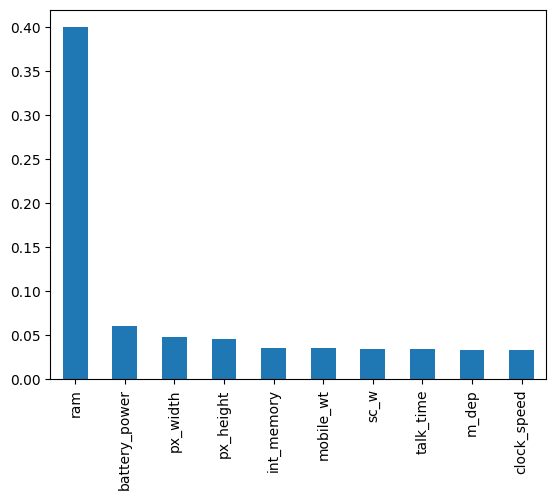

In [40]:
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind="bar")

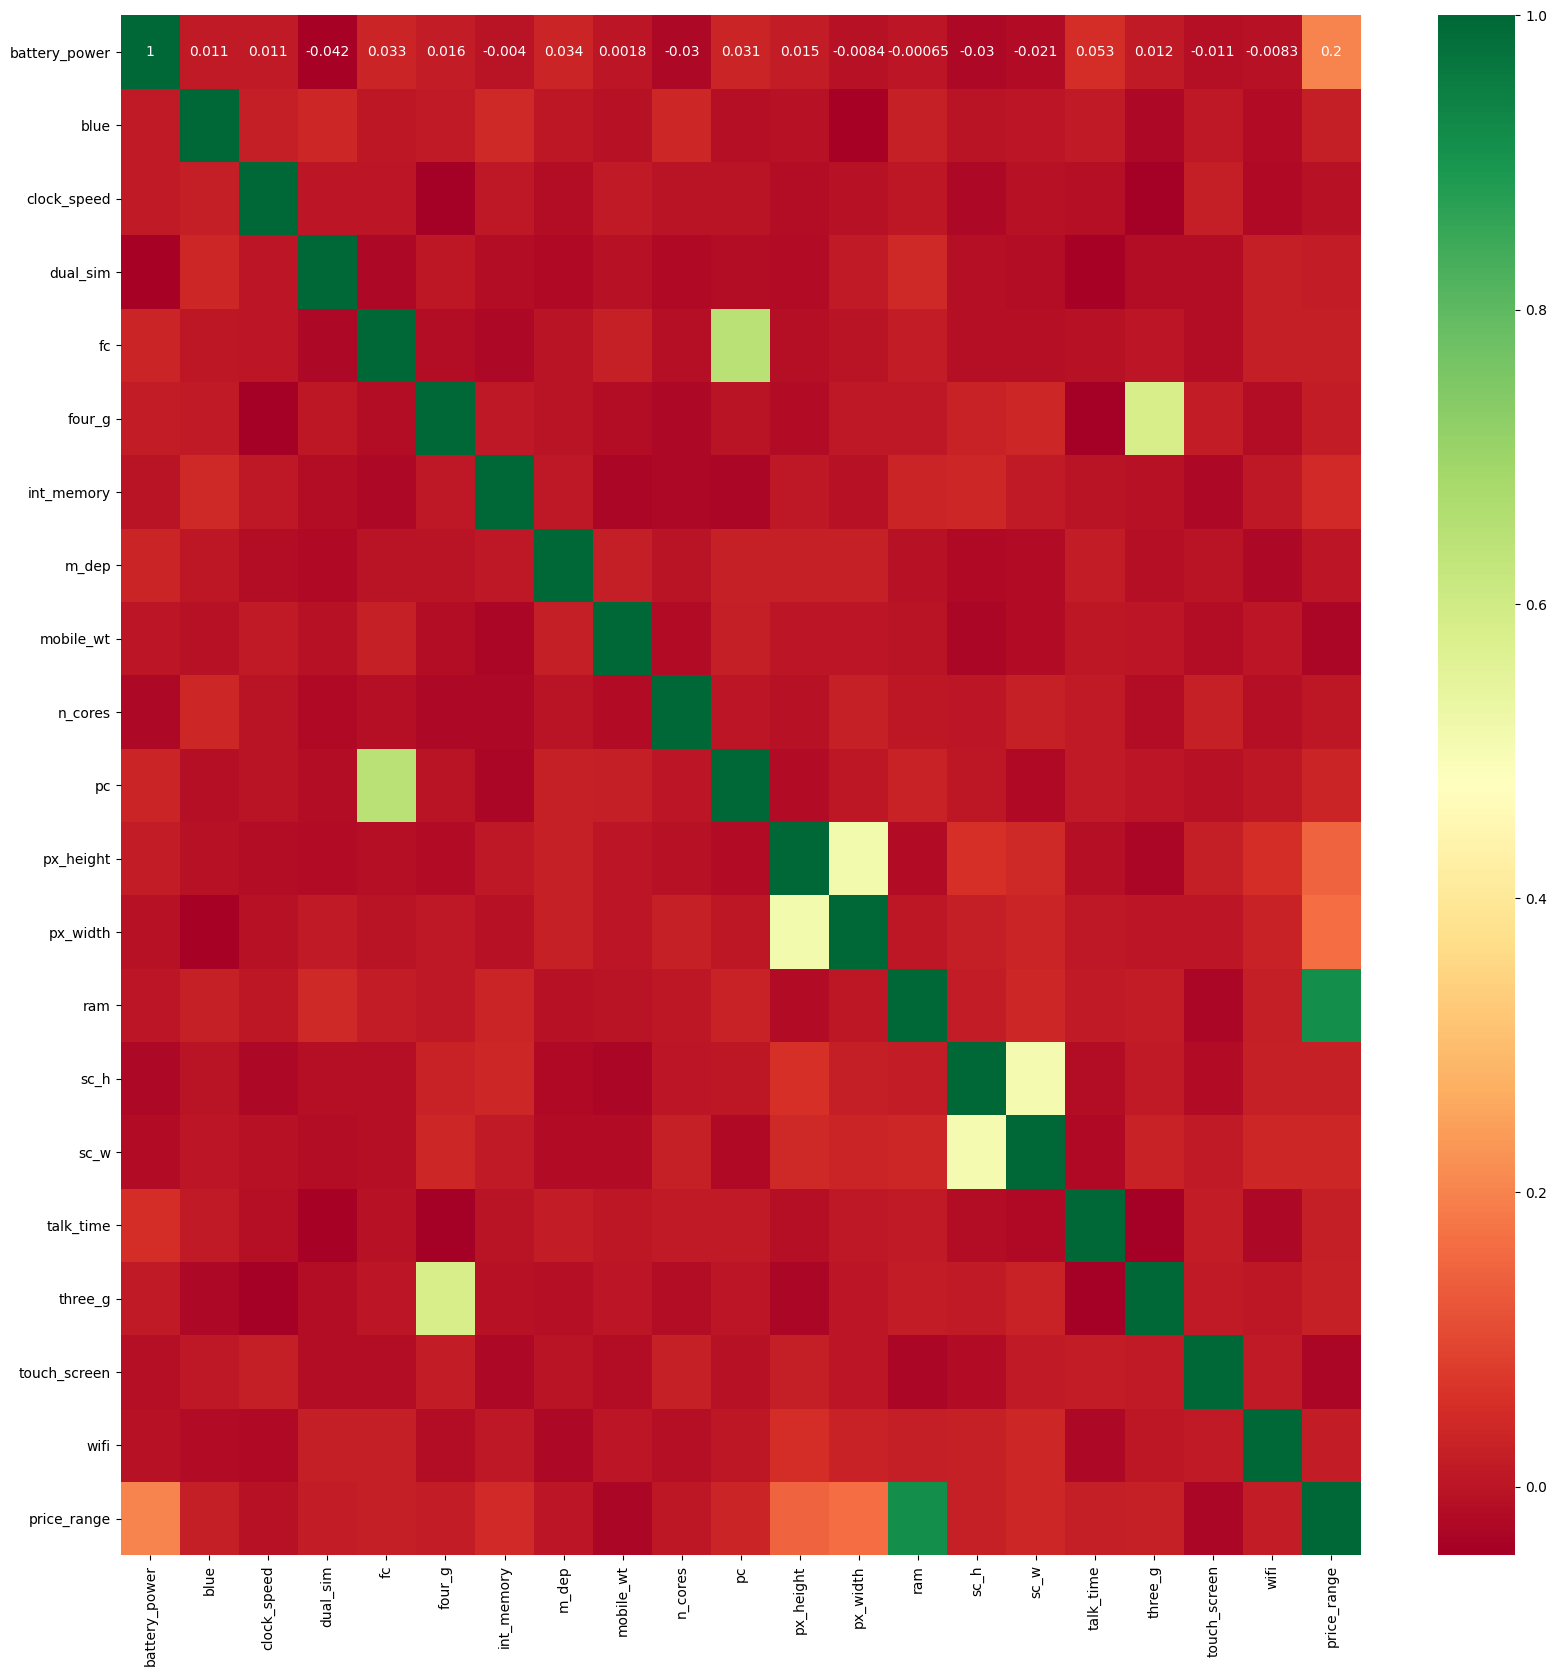

In [41]:
import seaborn as sns

correlation = df.corr()
top_feat = correlation.index

plt.figure(figsize=(20, 20))

g = sns.heatmap(df[top_feat].corr(), annot=True, cmap="RdYlGn")